# Análisis Exploratorio de Datos - Airbnb CDMX

In [97]:
import sys
sys.path.append('../src')

from extraccion import Extraccion
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

## 1. Extracción de Datos

In [98]:
extractor = Extraccion()
extractor.conectar()

df_listings = extractor.extraer_listings()
df_reviews = extractor.extraer_reviews()
df_calendar = extractor.extraer_calendar()

extractor.cerrar()

2025-10-24 14:33:35,481 - INFO - Conectado a Airbnb_mx
2025-10-24 14:33:36,651 - INFO - listings: 26401 registros
2025-10-24 14:33:44,191 - INFO - reviews: 1388226 registros
2025-10-24 14:34:52,420 - INFO - calendar: 9636365 registros
2025-10-24 14:34:53,961 - INFO - Conexión cerrada


## 2.1 Entendimiento General

In [99]:
print("LISTINGS")
print(f"Registros: {len(df_listings)}")
print(f"Columnas: {len(df_listings.columns)}")
df_listings.head()

LISTINGS
Registros: 26401
Columnas: 77


,_id,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,host_neighbourhood,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,68bf4b72f9cfc9b7eee9b2af,35797,https://www.airbnb.com/rooms/35797,20250625031918,2025-06-26,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,https://www.airbnb.com/users/show/153786,Dici,2010-06-28,"Mexico City, Mexico","Master in visual arts, film photography & Mark...",N/A,N/A,N/A,False,https://a0.muscache.com/im/pictures/user/00de1...,https://a0.muscache.com/im/pictures/user/00de1...,1.0,1.0,"['email', 'phone', 'work_email']",True,True,"Mexico City, D.f., Mexico",Cuajimalpa de Morelos,19.38283,-99.27178,Entire villa,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[Kitchen, Resort access, Hot water, Courtyard ...","$3,799.00",1,7,1.0,1.0,7.0,7.0,1.0,7.0,True,29,59,89,364,2025-06-26,0,0,0,188,0,0,0.0,False,1,1,0,0,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68bf4b72f9cfc9b7eee9b2b0,44616,https://www.airbnb.com/rooms/44616,20250625031918,2025-07-01,city scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Fernando,2010-08-09,"Mexico City, Mexico",Condesa Haus Rentals offers independent stud...,within an hour,100%,91%,False,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,13.0,13.0,"['email', 'phone', 'work_email']",True,True,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,14,5.5,5.5 baths,5.0,8.0,"[Free street parking, Free parking on premises...","$18,000.00",1,180,1.0,1.0,180.0,180.0,1.0,180.0,True,29,59,89,360,2025-07-01,65,1,0,179,0,6,108000.0,False,9,4,2,0,Condesa,2011-11-09,2025-01-01,4.59,4.56,4.70,4.87,4.78,4.98,4.47,0.39
2,68bf4b72f9cfc9b7eee9b2b1,56074,https://www.airbnb.com/rooms/56074,20250625031918,2025-07-01,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within a few hours,100%,100%,False,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,1.0,5.0,"['email', 'phone']",True,True,"Mexico City, DF, Mexico",Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[Dining table, Hot water, Hangers, Essentials,...",$585.00,15,250,15.0,15.0,250.0,250.0,15.0,250.0,True,3,33,63,338,2025-07-01,84,1,0,157,0,30,17550.0,False,1

In [100]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26401 entries, 0 to 26400
Data columns (total 77 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   _id                                           26401 non-null  object        
 1   id                                            26401 non-null  int64         
 2   listing_url                                   26401 non-null  object        
 3   scrape_id                                     26401 non-null  int64         
 4   last_scraped                                  26401 non-null  datetime64[ns]
 5   source                                        26401 non-null  object        
 6   name                                          26401 non-null  object        
 7   description                                   25633 non-null  object        
 8   neighborhood_overview                         13970 non-null  obje

In [101]:
print("REVIEWS")
print(f"Registros: {len(df_reviews)}")
print(f"Columnas: {len(df_reviews.columns)}")
df_reviews.head()

REVIEWS
Registros: 1388226
Columnas: 7


,_id,listing_id,id,date,reviewer_id,reviewer_name,comments
0,68bf4babf9cfc9b7eeea19d1,10257549,59265221,2016-01-08,31043833,Karolis,The flat is very nice newly renovated. The hos...
1,68bf4babf9cfc9b7eeea19d2,10257549,59352234,2016-01-09,7248934,James,Benito and his wife were great guests. Perfect...
2,68bf4babf9cfc9b7eeea19d3,10257549,59456981,2016-01-10,52707457,Manuel,Fue algo express. No pude volar y contacté con...
3,68bf4babf9cfc9b7eeea19d4,10257549,59661086,2016-01-13,52989229,Annie,This was a very comfortable and conveniently l...
4,68bf4babf9cfc9b7eeea19d5,10257549,59806795,2016-01-15,51159033,Svenja,"Nice place, really close to te airport - Nice ..."


In [102]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388226 entries, 0 to 1388225
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   _id            1388226 non-null  object        
 1   listing_id     1388226 non-null  int64         
 2   id             1388226 non-null  int64         
 3   date           1388226 non-null  datetime64[ns]
 4   reviewer_id    1388226 non-null  int64         
 5   reviewer_name  1388218 non-null  object        
 6   comments       1388226 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 74.1+ MB


In [103]:
print("CALENDAR")
print(f"Registros: {len(df_calendar)}")
print(f"Columnas: {len(df_calendar.columns)}")
df_calendar.head()

CALENDAR
Registros: 9636365
Columnas: 6


,_id,listing_id,date,available,minimum_nights,maximum_nights
0,68bf4559f9cfc9b7ee56a8a1,35797,2025-06-26,False,1,7
1,68bf4559f9cfc9b7ee56a8a2,35797,2025-06-27,True,1,7
2,68bf4559f9cfc9b7ee56a8a3,35797,2025-06-28,True,1,7
3,68bf4559f9cfc9b7ee56a8a4,35797,2025-06-29,True,1,7
4,68bf4559f9cfc9b7ee56a8a5,35797,2025-06-30,True,1,7


In [104]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9636365 entries, 0 to 9636364
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   _id             object        
 1   listing_id      int64         
 2   date            datetime64[ns]
 3   available       bool          
 4   minimum_nights  int64         
 5   maximum_nights  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(1)
memory usage: 376.8+ MB


## 2.2 Calidad de Datos

In [105]:
# Valores nulos
print("Valores nulos en Listings:")
nulos_listings = df_listings.isnull().sum()
print(nulos_listings[nulos_listings > 0].sort_values(ascending=False) if nulos_listings.sum() > 0 else "Sin valores nulos")

print("\nValores nulos en Reviews:")
nulos_reviews = df_reviews.isnull().sum()
print(nulos_reviews[nulos_reviews > 0].sort_values(ascending=False) if nulos_reviews.sum() > 0 else "Sin valores nulos")

print("\nValores nulos en Calendar:")
nulos_calendar = df_calendar.isnull().sum()
print(nulos_calendar[nulos_calendar > 0].sort_values(ascending=False) if nulos_calendar.sum() > 0 else "Sin valores nulos")

Valores nulos en Listings:
host_neighbourhood             12831
neighbourhood                  12431
neighborhood_overview          12431
host_about                     11237
host_location                   6237
review_scores_cleanliness       3375
review_scores_accuracy          3375
review_scores_value             3375
review_scores_location          3375
review_scores_checkin           3375
review_scores_communication     3375
first_review                    3373
reviews_per_month               3373
last_review                     3373
review_scores_rating            3373
beds                            3297
bathrooms                       3281
estimated_revenue_l365d         3274
price                           3274
host_is_superhost               1359
has_availability                1000
bedrooms                         924
host_since                       914
host_picture_url                 914
host_thumbnail_url               914
host_response_time               914
host_accept

In [106]:
# Duplicados (usando columnas ID para evitar error con listas)
print("Duplicados:")
if 'id' in df_listings.columns:
    print(f"  - Listings (por ID): {df_listings.duplicated(subset=['id']).sum()}")
else:
    print(f"  - Listings: No se puede verificar (columnas con listas)")

if 'id' in df_reviews.columns:
    print(f"  - Reviews (por ID): {df_reviews.duplicated(subset=['id']).sum()}")
else:
    print(f"  - Reviews: No se puede verificar")
    
if 'listing_id' in df_calendar.columns and 'date' in df_calendar.columns:
    print(f"  - Calendar (por listing_id + date): {df_calendar.duplicated(subset=['listing_id', 'date']).sum()}")
else:
    print(f"  - Calendar: No se puede verificar")

Duplicados:
  - Listings (por ID): 0
  - Reviews (por ID): 0
  - Calendar (por listing_id + date): 0


In [107]:
# Estadísticas descriptivas
df_listings.describe()

,id,scrape_id,last_scraped,host_id,host_since,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
count,2.640100e+04,2.640100e+04,26401,2.640100e+04,25487,25487.000000,25487.000000,26401.000000,26401.000000,26401.000000,23120.000000,25477.000000,23104.000000,26401.000000,26401.000000,26381.000000,26381.000000,2.638100e+04,2.638100e+04,26401.000000,2.640100e+04,26401.000000,26401.000000,26401.000000,26401.000000,26401,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,26401.000000,2.312700e+04,26401.000000,26401.000000,26401.000000,26401.000000,23028,23028,23028.000000,23026.000000,23026.000000,23026.000000,23026.000000,23026.000000,23026.000000,23028.000000
mean,6.488522e+17,2.025063e+13,2025-06-29 01:38:27.048975360,2.354112e+08,2018-08-25 18:28:14.134264576,24.467022,33.189822,19.405311,-99.165638,3.333434,1.450389,1.555089,1.953212,4.837014,490.553843,4.271218,5.129790,8.147160e+05,8.147443e+05,4.516280,8.141134e+05,15.763342,36.332753,58.327828,234.647248,2025-06-29 01:38:27.048975360,52.582326,15.711261,0.987160,124.529904,13.672891,84.498201,1.300932e+05,14.686906,11.626113,2.806636,0.212984,2022-04-25 12:28:53.402813952,2024-12-05 22:36:12.381448448,4.748716,4.782467,4.751745,4.836819,4.823578,4.840647,4.713399,1.806801
min,3.579700e+04,2.025063e+13,2025-06-25 00:00:00,7.365000e+03,2009-02-03 00:00:00,1.000000,1.000000,19.177848,-99.339630,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,2025-06-25 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,2011-04-02 00:00:00,2013-12-21 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.010000
25%,4.255992e+07,2.025063e+13,2025-06-27 00:00:00,5.436477e+07,2016-02-03 00:00:00,1.000000,2.000000,19.391880,-99.178614,2.000000,1.000000,1.000000,1.000000,1.000000,180.000000,1.000000,1.000000,3.650000e+02,3.650000e+02,1.000000,3.650000e+02,2.000000,19.000000,36.000000,142.000000,2025-06-27 00:00:00,4.000000,0.000000,0.000000,83.000000,0.000000,0.000000,6.840000e+03,1.000000,0.000000,0.000000,0.000000,2020-09-20 00:00:00,2025-02-07 00:00:00,4.700000,4.750000,4.700000,4.820000,4.810000,4.800000,4.660000,0.440000
50%,7.821415e+17,2.025063e+13,2025-06-30 00:00:00,1.705833e+08,2018-01-31 00:00:00,4.000000,5.000000,19.415120,-99.167260,2.000000,1.000000,1.000000,1.000000,2.000000,365.000000,1.000000,2.000000,7.300000e+02,1.125000e+03,2.000000,7.377000e+02,18.000000,44.000000,71.000000,269.000000,2025-06-30 00:00:00,21.000000,7.000000,0.000000,153.000000,4.000000,48.000000,5.796000e+04,3.000000,1.000000,0.000000,0.000000,2023-01-23 00:00:00,2025-05-23 00:00:00,4.840000,4.880000,4.850000,4.920000,4.920000,4.920000,4.800000,1.230000
75%,1.148084e+18,2.025063e+13,2025-07-01 00:00:00,4.161560e+08,2021-08-16 00:00:00,14.000000,17.000000,19.431892,-99.153975,4.000000,2.000000,2.000000,2.000000,2.000000,1125.000000,2.000000,3.000000,1.125000e+03,1.125000e+03,2.900000,1.125000e+03,27.000000,57.000000,86.000000,348.000000,2025-07-01 00:00:00,67.000000,24.000000,1.000000,179.000000,20.00000

## 3. Transformación de Datos

In [108]:
from transformacion import Transformacion

transformador = Transformacion()

# Transformar cada dataset
df_listings_limpio = transformador.transformar_listings(df_listings)
df_reviews_limpio = transformador.transformar_reviews(df_reviews)
df_calendar_limpio = transformador.transformar_calendar(df_calendar)

print(f"\n✓ Datos transformados:")
print(f"  - Listings: {len(df_listings_limpio):,} registros")
print(f"  - Reviews: {len(df_reviews_limpio):,} registros")
print(f"  - Calendar: {len(df_calendar_limpio):,} registros")

2025-10-24 14:34:56,884 - INFO - Transformando listings: 26401 registros
2025-10-24 14:34:56,905 - INFO - Columna _id eliminada
2025-10-24 14:34:56,919 - INFO - Duplicados eliminados: 0
2025-10-24 14:34:56,995 - INFO - Filas con nulos eliminadas: 0
2025-10-24 14:34:57,032 - INFO - Precio normalizado en columna price
2025-10-24 14:34:57,035 - INFO - Precios categorizados
2025-10-24 14:34:57,516 - INFO - Columnas convertidas a JSON: ['host_verifications', 'amenities']
2025-10-24 14:34:57,517 - INFO - Listings transformado: 26401 registros finales
2025-10-24 14:34:57,726 - INFO - Transformando reviews: 1388226 registros
2025-10-24 14:34:57,808 - INFO - Columna _id eliminada
2025-10-24 14:34:57,902 - INFO - Duplicados eliminados: 0
2025-10-24 14:34:57,949 - INFO - Fechas convertidas en columna date
2025-10-24 14:34:58,049 - INFO - Variables de fecha derivadas
2025-10-24 14:34:58,050 - INFO - Reviews transformado: 1388226 registros finales
2025-10-24 14:34:58,051 - INFO - Transformando cale


✓ Datos transformados:
  - Listings: 26,401 registros
  - Reviews: 1,388,226 registros
  - Calendar: 9,636,365 registros


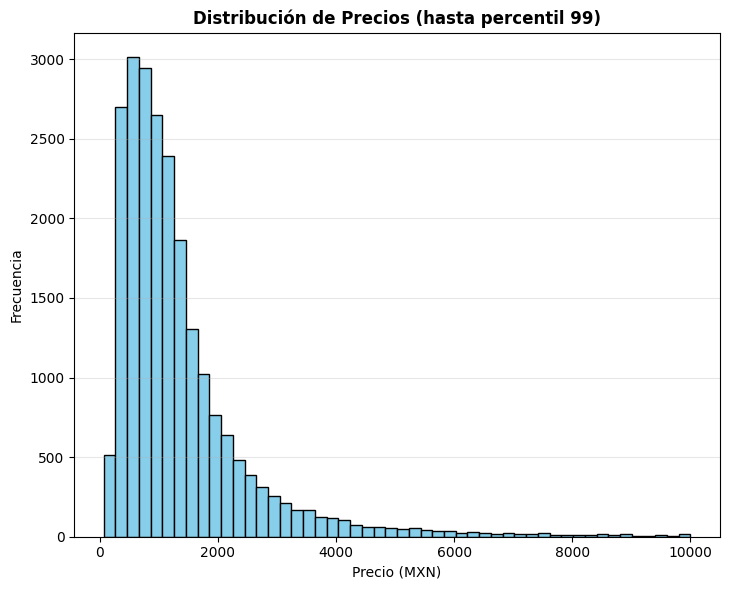


📊 Estadísticas de Precios:
  • Total de propiedades: 26,401
  • Mínimo: $66.00
  • Máximo: $900,000.00
  • Promedio: $1,989.29
  • Mediana: $1,039.00
  • Percentil 99: $10,000.00

  ⚠️ Nota: Gráficas muestran hasta percentil 99 para mejor visualización
     (Excluye 3505 outliers extremos)


In [109]:
# Distribución de precios (manejando outliers extremos)
if 'price' in df_listings_limpio.columns:
    # Filtrar outliers extremos para mejor visualización
    # Usar percentil 99 como límite superior
    percentil_99 = df_listings_limpio['price'].quantile(0.99)
    df_precios_viz = df_listings_limpio[df_listings_limpio['price'] <= percentil_99]
    
    plt.figure(figsize=(14, 6))
    
    # Histograma
    plt.subplot(1, 2, 1)
    plt.hist(df_precios_viz['price'], bins=50, edgecolor='black', color='skyblue')
    plt.title('Distribución de Precios (hasta percentil 99)', fontsize=12, fontweight='bold')
    plt.xlabel('Precio (MXN)')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()
    
    # Estadísticas
    print(f"\n📊 Estadísticas de Precios:")
    print(f"  • Total de propiedades: {len(df_listings_limpio):,}")
    print(f"  • Mínimo: ${df_listings_limpio['price'].min():,.2f}")
    print(f"  • Máximo: ${df_listings_limpio['price'].max():,.2f}")
    print(f"  • Promedio: ${df_listings_limpio['price'].mean():,.2f}")
    print(f"  • Mediana: ${df_listings_limpio['price'].median():,.2f}")
    print(f"  • Percentil 99: ${percentil_99:,.2f}")
    print(f"\n  ⚠️ Nota: Gráficas muestran hasta percentil 99 para mejor visualización")
    print(f"     (Excluye {len(df_listings_limpio) - len(df_precios_viz)} outliers extremos)")

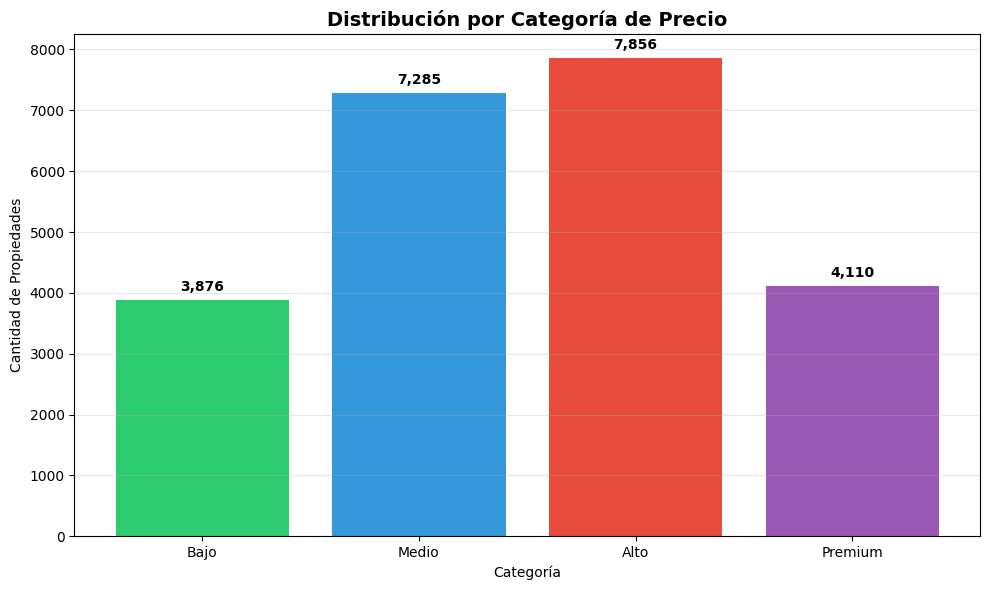

In [110]:
# Gráfico de categorías de precio
if 'categoria_precio' in df_listings_limpio.columns:
    plt.figure(figsize=(10, 6))
    
    categoria_counts = df_listings_limpio['categoria_precio'].value_counts().sort_index()
    
    plt.bar(categoria_counts.index, categoria_counts.values, color=['#2ecc71', '#3498db', '#e74c3c', '#9b59b6'])
    plt.title('Distribución por Categoría de Precio', fontsize=14, fontweight='bold')
    plt.xlabel('Categoría')
    plt.ylabel('Cantidad de Propiedades')
    plt.grid(axis='y', alpha=0.3)
    
    for i, v in enumerate(categoria_counts.values):
        plt.text(i, v + 100, f'{v:,}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

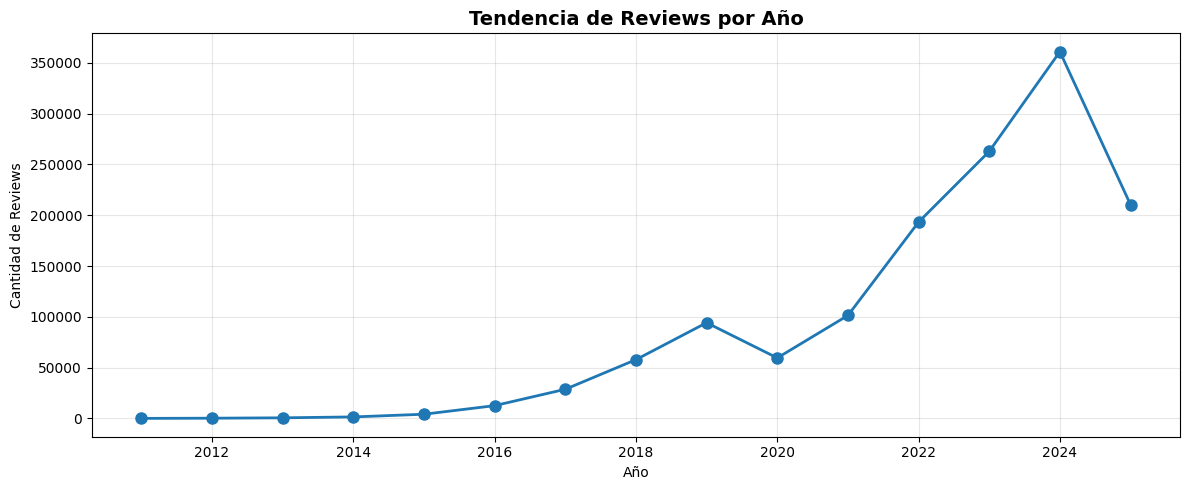


Año con más reviews: 2024 (360,978 reviews)


In [111]:
# Distribución de reviews por año
if 'año' in df_reviews_limpio.columns:
    plt.figure(figsize=(12, 5))
    
    reviews_por_año = df_reviews_limpio['año'].value_counts().sort_index()
    
    plt.plot(reviews_por_año.index, reviews_por_año.values, marker='o', linewidth=2, markersize=8)
    plt.title('Tendencia de Reviews por Año', fontsize=14, fontweight='bold')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Reviews')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nAño con más reviews: {reviews_por_año.idxmax()} ({reviews_por_año.max():,} reviews)")

In [112]:
# Verificar categorización de precios
if 'categoria_precio' in df_listings_limpio.columns:
    print("Distribución por categoría de precio:")
    print(df_listings_limpio['categoria_precio'].value_counts().sort_index())

Distribución por categoría de precio:
categoria_precio
Bajo       3876
Medio      7285
Alto       7856
Premium    4110
Name: count, dtype: int64


## 4. Carga de Datos

In [113]:
from carga import Carga

cargador = Carga()

# Cargar a SQLite
print("Cargando a SQLite...")
cargador.cargar_a_sqlite(df_listings_limpio, 'listings')
cargador.cargar_a_sqlite(df_reviews_limpio, 'reviews')
cargador.cargar_a_sqlite(df_calendar_limpio, 'calendar')

# Cargar a Excel
print("\nCargando a Excel...")
cargador.cargar_a_excel(df_listings_limpio, 'listings_limpio.xlsx')

# Reviews: solo muestra si es muy grande
if len(df_reviews_limpio) > 100000:
    print(f"Reviews tiene {len(df_reviews_limpio):,} registros, exportando muestra de 100,000...")
    df_reviews_muestra = df_reviews_limpio.head(100000)
    cargador.cargar_a_excel(df_reviews_muestra, 'reviews_muestra.xlsx')
else:
    cargador.cargar_a_excel(df_reviews_limpio, 'reviews_limpio.xlsx')

print("\n✓ Datos cargados exitosamente")

Cargando a SQLite...


2025-10-24 14:35:01,572 - INFO - Cargados 26401 registros a tabla listings en SQLite
2025-10-24 14:35:06,600 - INFO - Cargados 1388226 registros a tabla reviews en SQLite
2025-10-24 14:35:28,151 - INFO - Cargados 9636365 registros a tabla calendar en SQLite



Cargando a Excel...


2025-10-24 14:36:02,079 - INFO - Cargados 26401 registros a listings_limpio.xlsx


Reviews tiene 1,388,226 registros, exportando muestra de 100,000...


2025-10-24 14:36:12,740 - INFO - Cargados 100000 registros a reviews_muestra.xlsx



✓ Datos cargados exitosamente


In [114]:
# Verificar carga en SQLite
print("Verificando carga en SQLite...")
count_listings = cargador.verificar_carga('listings')
count_reviews = cargador.verificar_carga('reviews')
count_calendar = cargador.verificar_carga('calendar')

print(f"\n✓ Base de datos SQLite: data/airbnb.db")
print(f"  • listings:  {count_listings:>10,} registros")
print(f"  • reviews:   {count_reviews:>10,} registros")
print(f"  • calendar:  {count_calendar:>10,} registros")

Verificando carga en SQLite...


2025-10-24 14:36:12,974 - INFO - Verificación: 26401 registros en tabla listings
2025-10-24 14:36:13,814 - INFO - Verificación: 1388226 registros en tabla reviews
2025-10-24 14:36:13,900 - INFO - Verificación: 9636365 registros en tabla calendar



✓ Base de datos SQLite: data/airbnb.db
  • listings:      26,401 registros
  • reviews:    1,388,226 registros
  • calendar:   9,636,365 registros
